In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from auxiliary import load_pickle
%matplotlib inline

sns.set_theme()

In [2]:
PATH='./results/TestSuite-06_11_2021-23_52_25'

In [3]:
data = load_pickle(PATH)

In [4]:
data

[{'task': 'MNIST',
  'graph': 'FullyConnectedGraph',
  'nr_classes': 0,
  'nr_nodes': 4,
  'training_epochs': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
  'epoch_list': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  'add_privacy_list': False,
  'epsilon_list': 0.1,
  'delta_list': 0.5,
  'node_0': {'lr': 0.0001,
   'alpha': 0.5,
   'test_accuracies': [0.9204,
    0.9304,
    0.9456,
    0.9532,
    0.962,
    0.9584,
    0.9628,
    0.96,
    0.9632,
    0.9624],
   'test_losses': [0.32874828577041626,
    0.2579394578933716,
    0.16792282462120056,
    0.15064875781536102,
    0.12192954123020172,
    0.12521858513355255,
    0.11280182749032974,
    0.11213726550340652,
    0.10151591897010803,
    0.10545496642589569],
   'train_accuracies': [0.8484444444444444,
    0.9091111111111111,
    0.9648888888888889,
    0.9724444444444444,
    0.9775555555555555,
    0.9835555555555555,
    0.9871111111111112,
    0.9893333333333333,
    0.9902222222222222,
    0.9937777777777778],
   'train_lo

In [5]:
def get_top1_accuracy(results):
    nr_nodes = results['nr_nodes']
    top_acc_list = []
    for i in range(nr_nodes):
        node_dict = results[f'node_{i}']
        top_acc_list.append(max(node_dict['test_accuracies']))

    return top_acc_list, sum(top_acc_list)/len(top_acc_list)

In [6]:
def get_top1_per_epoch(results):
    nr_nodes = results['nr_nodes']
    top_acc_list = []
    for i in range(nr_nodes):
        node_dict = results[f'node_{i}']
        top_acc_list.append(node_dict['test_accuracies'])
    transpose = list(zip(*top_acc_list))
    return [max(node) for node in transpose]

In [7]:
get_top1_per_epoch(data[0])

[0.9576, 0.9772, 0.9832, 0.982, 0.9832, 0.9844, 0.9816, 0.9856, 0.9828, 0.9876]

In [55]:
def graph_top1_epochs(results, n_subplots = 3):
    
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")
    
    f, ax = plt.subplots(1, n_subplots, sharex=True, sharey=True, figsize=(13,5))
        
    for idx, run in enumerate(results):
        ax[idx%3].plot(run['epoch_list'], get_top1_per_epoch(run), label=f"{run['graph']}")
        #ax[idx%3].set_xticklabels(run['epoch_list'], fontsize=12)
        ax[idx%3].tick_params(axis='x', labelsize=15)
        ax[idx%3].tick_params(axis='y', labelsize=13)
        
        
    for i in range(n_subplots):
        ax[i].set_xlabel("Epochs", fontsize=18)
        ax[i].set_ylabel("Test Accuracy", fontsize=18)
        ax[i].set_xlim(right=10)
        
    ax[2].legend()
    plt.title('')

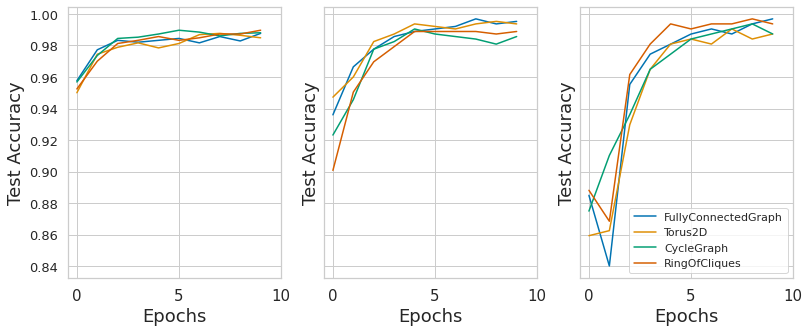

In [59]:
fig = graph_top1_epochs(data)
fig
plt.savefig("./plots/topology_testrun.pdf")

In [ ]:
def graph_top1_bytes(results):
    f, ax = plt.subplots(1, 1)
    for run in results:
        ax = sns.lineplot(x = run['node_0']['sent_bytes'],y = get_top1_per_epoch(run), label=f"{run['nr_nodes']} Nodes")
    ax.legend()
    plt.xlabel('Bytes')
    plt.ylabel('Accuracy')

In [ ]:
graph_top1_bytes(data)